Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

In [1]:
import matplotlib.pyplot as plt
from dataloader_module import load_data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

## Càrrega i pre-processament de les dades

In [2]:
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)

df = X.copy()
df['stroke'] = y

## Aplicació kmeans


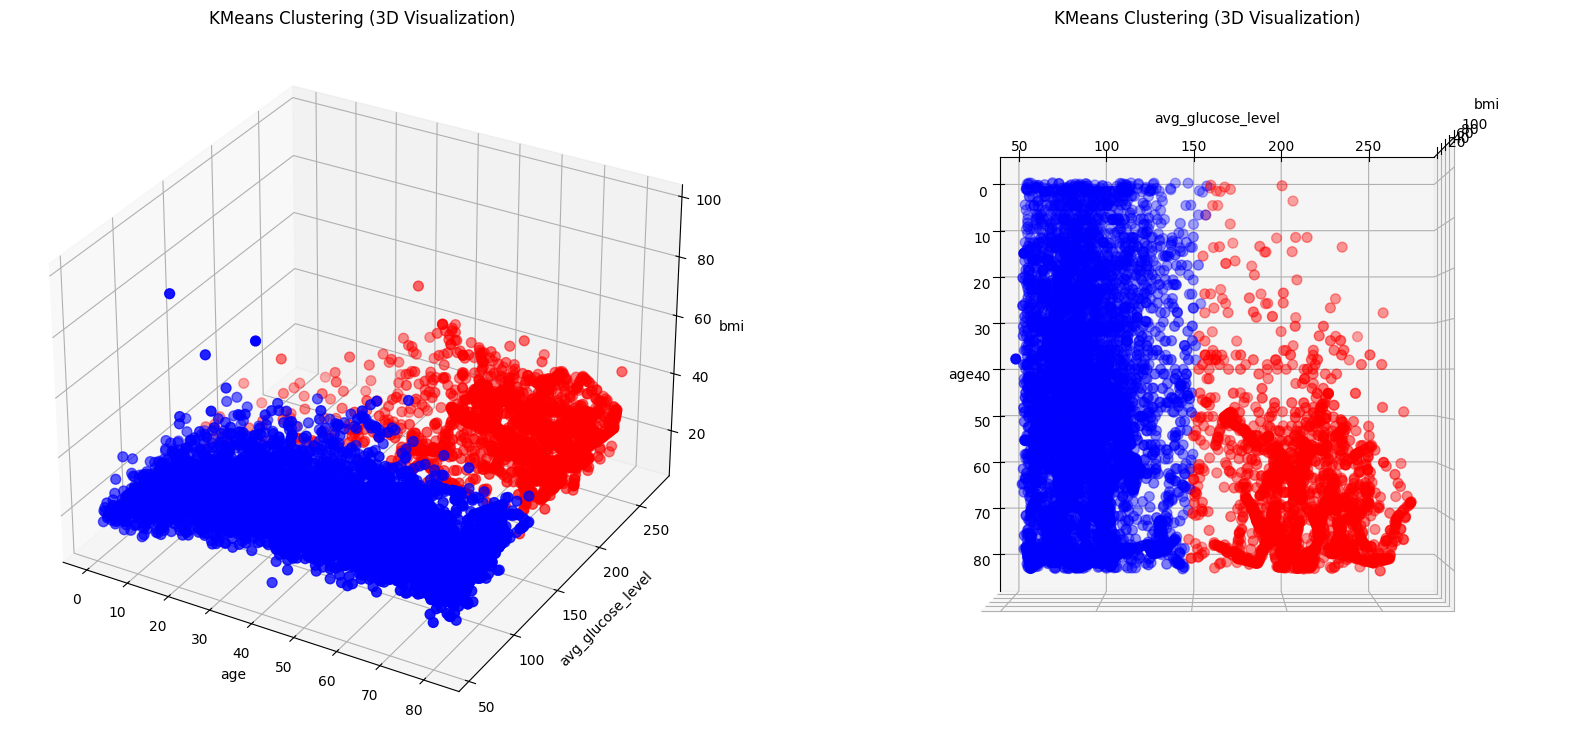

In [3]:
from sklearn.cluster import KMeans
from graphs_module import cluster_3d

kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X)
labels_2 = kmeans_2.labels_
df['cluster_2'] = labels_2

features = ['age', 'avg_glucose_level', 'bmi']
colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange', 5: 'black', 6: 'brown', 7: 'pink', 8: 'gray', 9: 'olive'}

cluster_3d(X, y, labels_2, ["age", "avg_glucose_level", "bmi"], colors)

In [4]:
cluster_means = df.groupby('cluster_2')['stroke'].mean().sort_values(ascending=False)

high_risk_clusters = cluster_means.index.tolist()

print("Clusters ordered by stroke mean (high to low):", high_risk_clusters)

Clusters ordered by stroke mean (high to low): [1, 0]


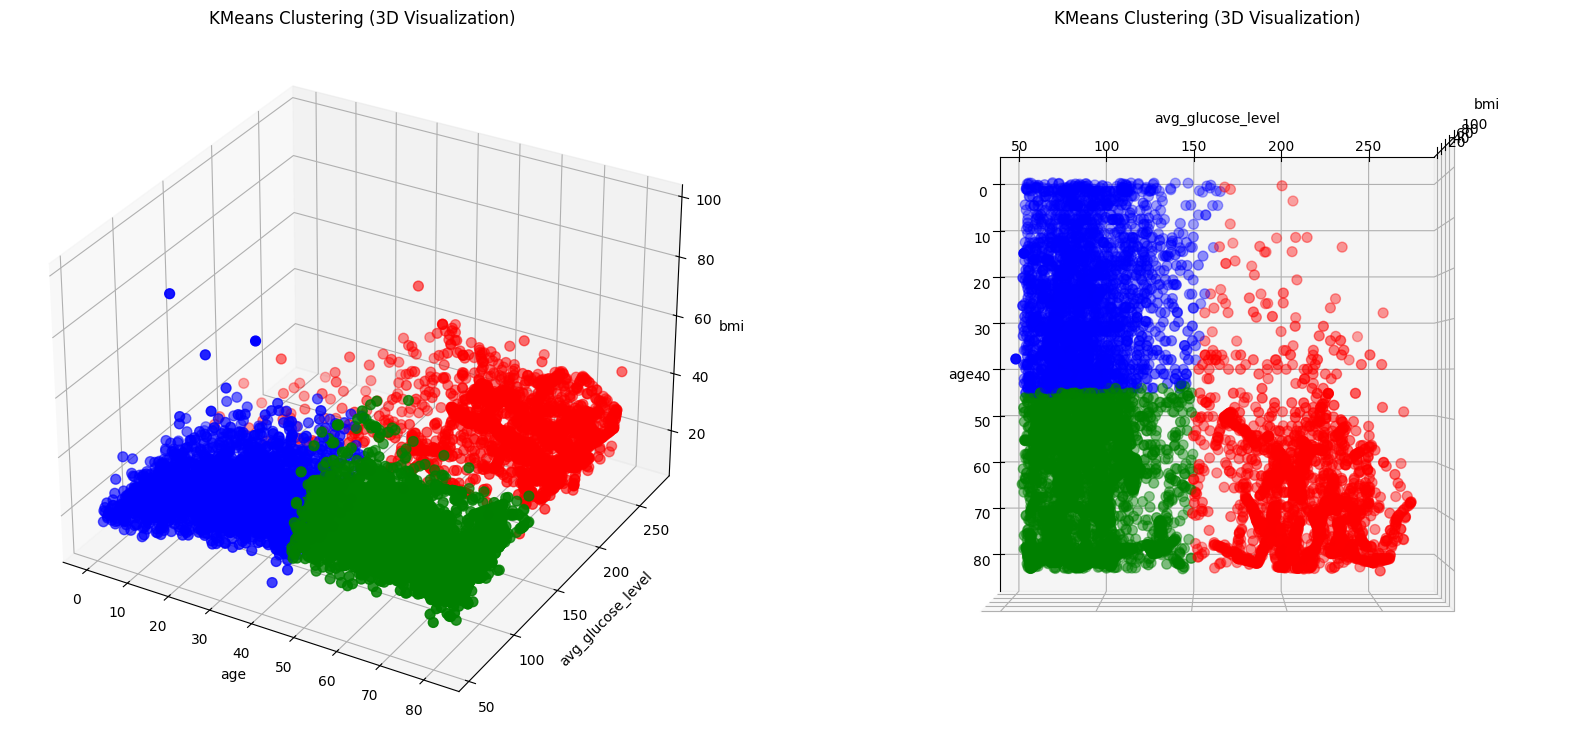

In [5]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)
labels_3 = kmeans_3.labels_
df['cluster_3'] = labels_3

cluster_3d(X, y, labels_3, ["age", "avg_glucose_level", "bmi"], colors)

## Mètriques d'avaluació del clustering

In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Per validar la cohesió i la separació dels clusters. 
# Per 2 clusters
silhouette_2 = silhouette_score(X, labels_2)
davies_bouldin_2 = davies_bouldin_score(X, labels_2)

# Per 3 clusters
silhouette_3 = silhouette_score(X, labels_3)
davies_bouldin_3 = davies_bouldin_score(X, labels_3)

# Imprimir resultados
print("2 Clusters:")
print(f"Silhouette Score: {silhouette_2:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_2:.4f}")

print("3 Clusters:")
print(f"Silhouette Score: {silhouette_3:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_3:.4f}")

2 Clusters:
Silhouette Score: 0.6697
Davies-Bouldin Index: 0.4480
3 Clusters:
Silhouette Score: 0.4450
Davies-Bouldin Index: 0.8794


## Anàlisi dels clústers

Average (2 clusters):
                 age  avg_glucose_level        bmi
cluster_2                                         
0          50.967037          90.051538  28.469613
1          66.705513         209.203896  32.819027


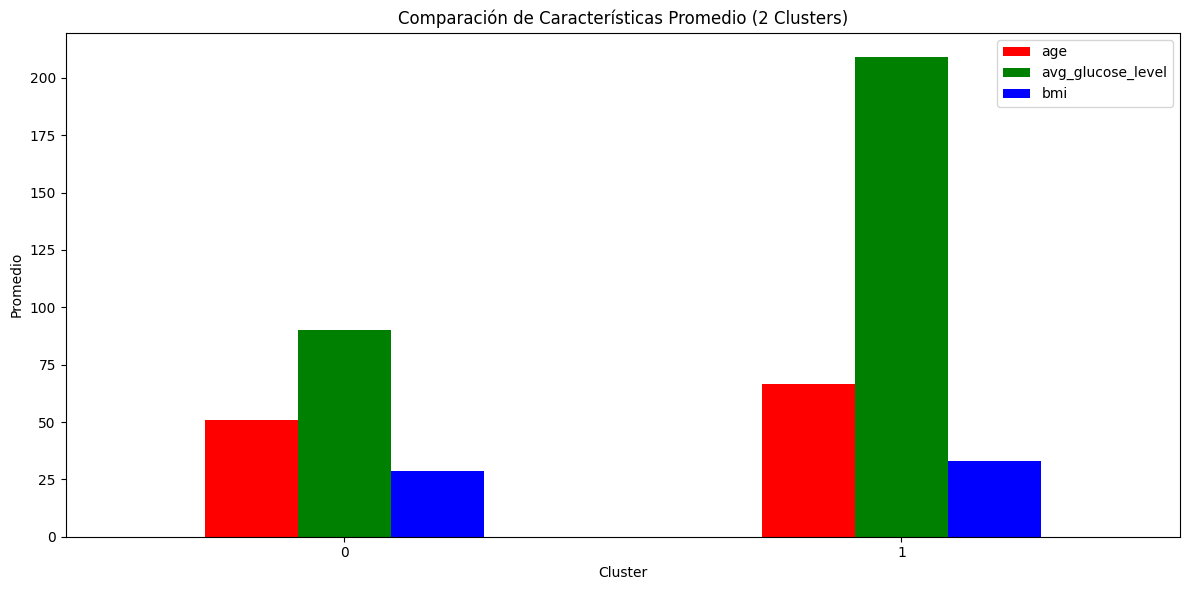

Características promedio por cluster (3 clusters):
                 age  avg_glucose_level        bmi
cluster_3                                         
0          24.636793          89.843182  26.920115
1          66.962673         209.570813  32.886379
2          65.459540          90.398758  29.308018


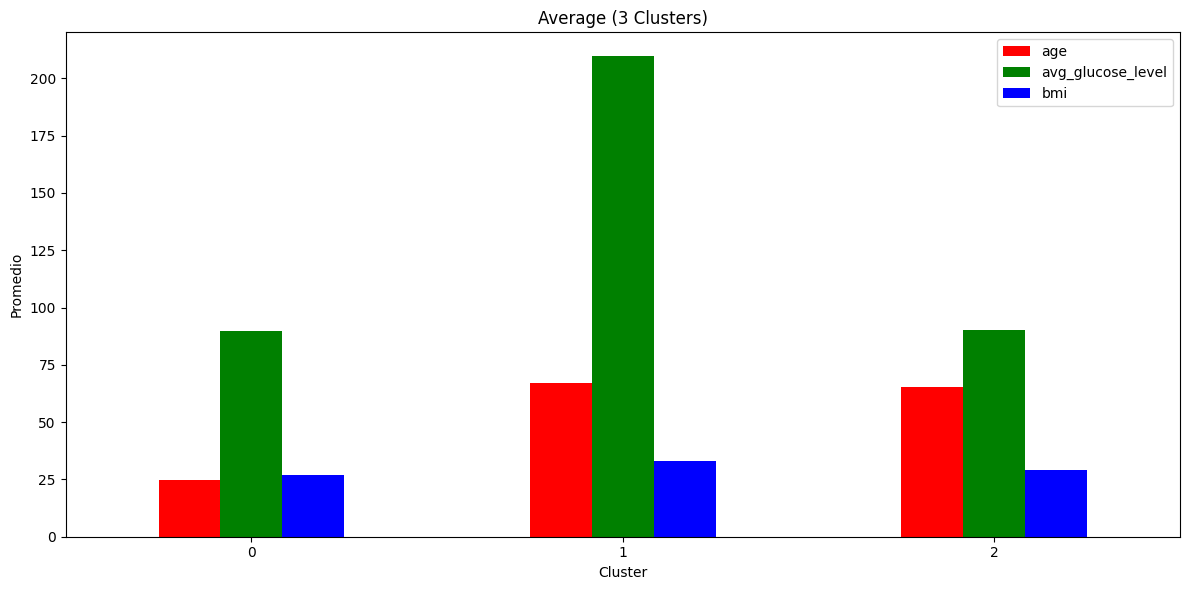

In [7]:
columns_to_analyze = ['age', 'avg_glucose_level', 'bmi']

#2 clústers
summary_2 = df.groupby('cluster_2')[columns_to_analyze].mean()
print("Average (2 clusters):")
print(summary_2)

summary_2.reset_index(inplace=True)
summary_2.plot(
    x='cluster_2', kind='bar', figsize=(12, 6), color=['red', 'green','blue']
)
plt.title('Comparación de Características Promedio (2 Clusters)')
plt.ylabel('Promedio')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#3 clústers
summary_3 = df.groupby('cluster_3')[columns_to_analyze].mean()
print("Características promedio por cluster (3 clusters):")
print(summary_3)

summary_3.reset_index(inplace=True)
summary_3.plot(
    x='cluster_3', kind='bar', figsize=(12, 6), color=['red', 'green', 'blue']
)
plt.title('Average (3 Clusters)')
plt.ylabel('Promedio')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## PCA i visualització

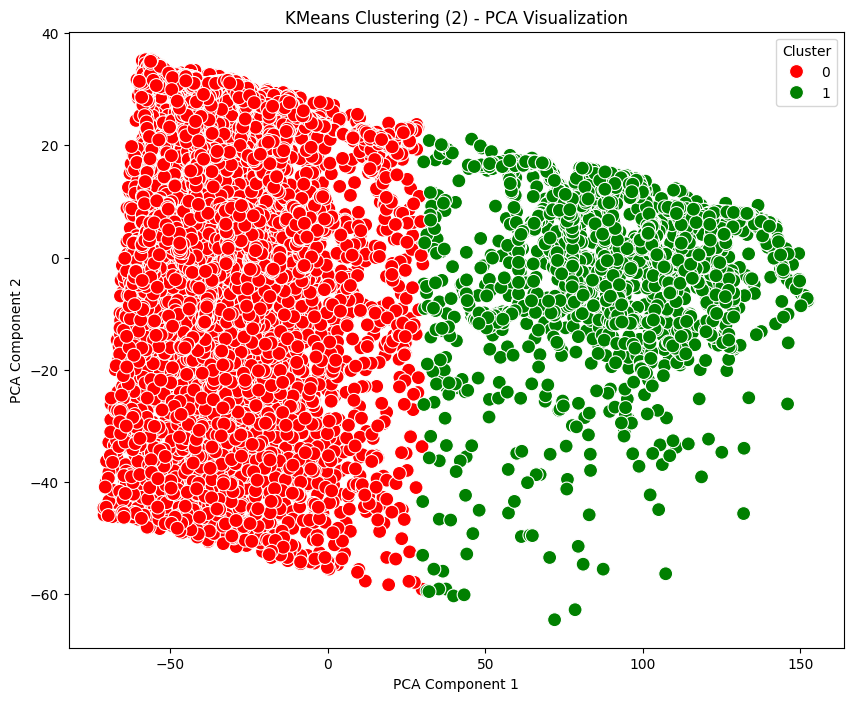

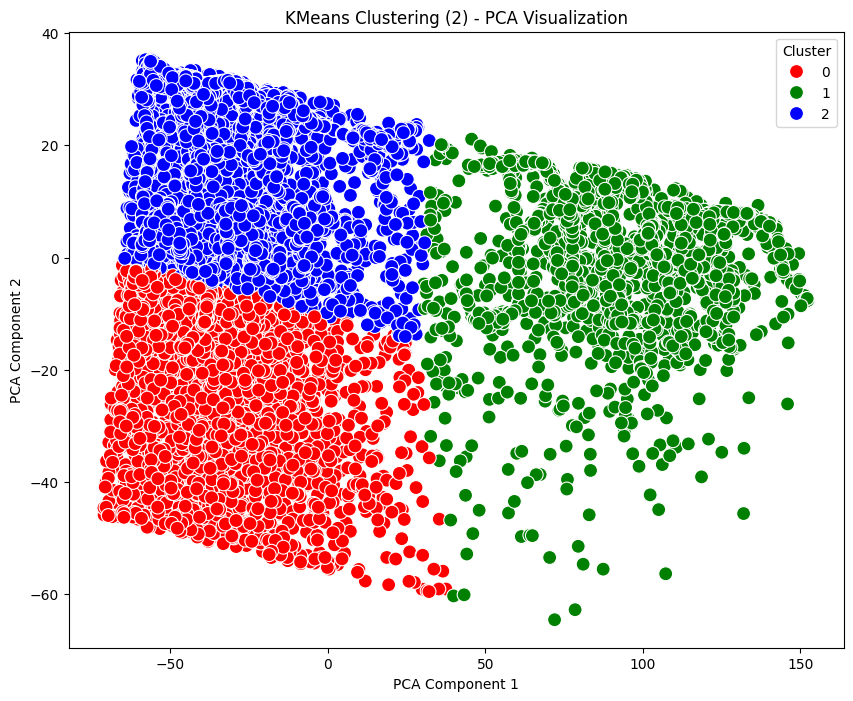

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
"""
# Imprimir les dues components principals
components = pca.components_
features = X.drop('cluster', axis=1).columns
pca_df = pd.DataFrame(components, columns=features, index=[f'PC{i+1}' for i in range(components.shape[0])])
print(pca_df)
"""
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster_2'], palette={0: 'red', 1: 'green'}, s=100)

plt.title('KMeans Clustering (2) - PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.legend(title="Cluster")
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
"""
# Imprimir les dues components principals
components = pca.components_
features = X.drop('cluster', axis=1).columns
pca_df = pd.DataFrame(components, columns=features, index=[f'PC{i+1}' for i in range(components.shape[0])])
print(pca_df)
"""
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster_3'], palette = {0: 'red', 1: 'green', 2: 'blue'}, s=100)

plt.title('KMeans Clustering (2) - PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.legend(title="Cluster")
plt.show()

## t-SNE i visualització

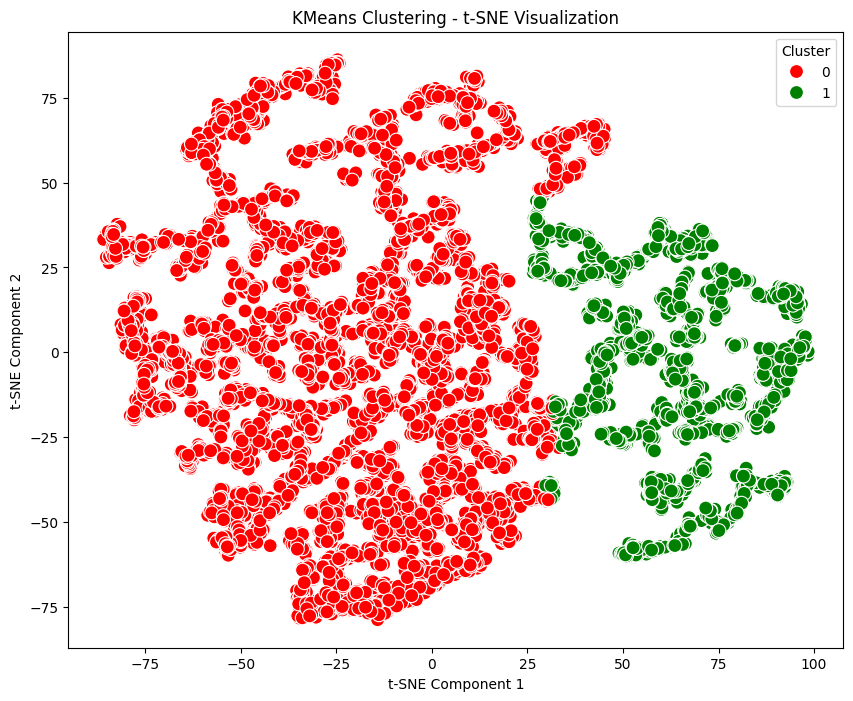

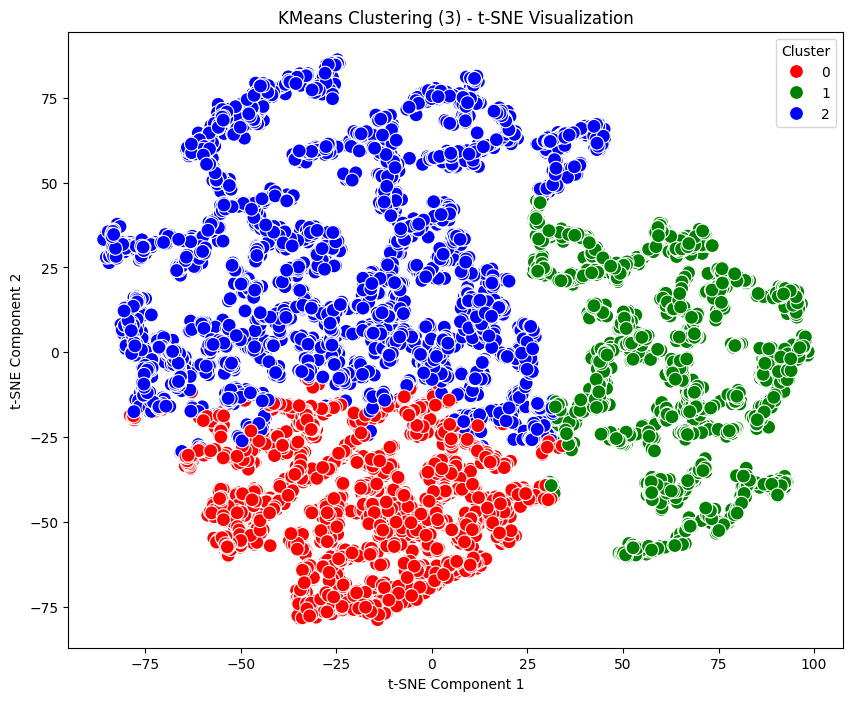

In [9]:
#2 CLUSTERS
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter_tsne = sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['cluster_2'], palette={0: 'red', 1: 'green'}, s=100)

plt.title('KMeans Clustering - t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.legend(title="Cluster")
plt.show()

#3 CLUSTERS
tsne_result_3 = tsne.fit_transform(X)  # Tornar a entrenar per a 3 clusters
plt.figure(figsize=(10, 8))
scatter_tsne = sns.scatterplot(x=tsne_result_3[:, 0], y=tsne_result_3[:, 1], hue=df['cluster_3'], palette = {0: 'red', 1: 'green', 2: 'blue'}, s=100)

plt.title('KMeans Clustering (3) - t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.legend(title="Cluster")
plt.show()